In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Fetching data from Yahoo Finance
df = pd.read_csv('AAPL.csv')
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2023-05-15  173.160004  173.210007  171.470001  172.070007  171.161011   
1  2023-05-16  171.990005  173.139999  171.800003  172.070007  171.161011   
2  2023-05-17  171.710007  172.929993  170.419998  172.690002  171.777740   
3  2023-05-18  173.000000  175.240005  172.580002  175.050003  174.125259   
4  2023-05-19  176.389999  176.389999  174.940002  175.160004  174.234695   

     Volume  
0  37266700  
1  42110300  
2  57951600  
3  65496700  
4  55772400  


In [3]:
data = df.filter(['Close'])
dataset = data.values
print(dataset[0:5])
print(f"Dataset Lowest value: {dataset.min()}")
print(f"Dataset Highest value: {dataset.max()} \n" )

print("After Scaling:")
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data[0:5])

[[172.070007]
 [172.070007]
 [172.690002]
 [175.050003]
 [175.160004]]
Dataset Lowest value: 165.0
Dataset Highest value: 198.110001 

After Scaling:
[[0.21353086]
 [0.21353086]
 [0.23225617]
 [0.30353376]
 [0.30685605]]


In [8]:
# Split the scaled data into features (x) and labels (y)
x = []
y = []

for i in range(60, len(scaled_data)):
    x.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

# Convert x and y to numpy arrays
x, y = np.array(x), np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)


# Reshape the data (if necessary)
dx_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Display the shapes of the data
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (152, 60), y_train shape: (152,)
x_test shape: (38, 60, 1), y_test shape: (38,)


In [9]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout regularization
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, batch_size=1, epochs=100)


Epoch 1/100
152/152 [==============================] - 10s 40ms/step - loss: 0.0456
Epoch 2/100
152/152 [==============================] - 5s 30ms/step - loss: 0.0256
Epoch 3/100
152/152 [==============================] - 5s 32ms/step - loss: 0.0211
Epoch 4/100
152/152 [==============================] - 5s 35ms/step - loss: 0.0205
Epoch 5/100
152/152 [==============================] - 4s 28ms/step - loss: 0.0181
Epoch 6/100
152/152 [==============================] - 5s 30ms/step - loss: 0.0168
Epoch 7/100
152/152 [==============================] - 6s 38ms/step - loss: 0.0152
Epoch 8/100
152/152 [==============================] - 4s 28ms/step - loss: 0.0146
Epoch 9/100
152/152 [==============================] - 6s 37ms/step - loss: 0.0147
Epoch 10/100
152/152 [==============================] - 5s 30ms/step - loss: 0.0126
Epoch 11/100
152/152 [==============================] - 5s 31ms/step - loss: 0.0123
Epoch 12/100
152/152 [==============================] - 6s 39ms/step - loss: 0.0130


2/2 [==============================] - 0s 16ms/step


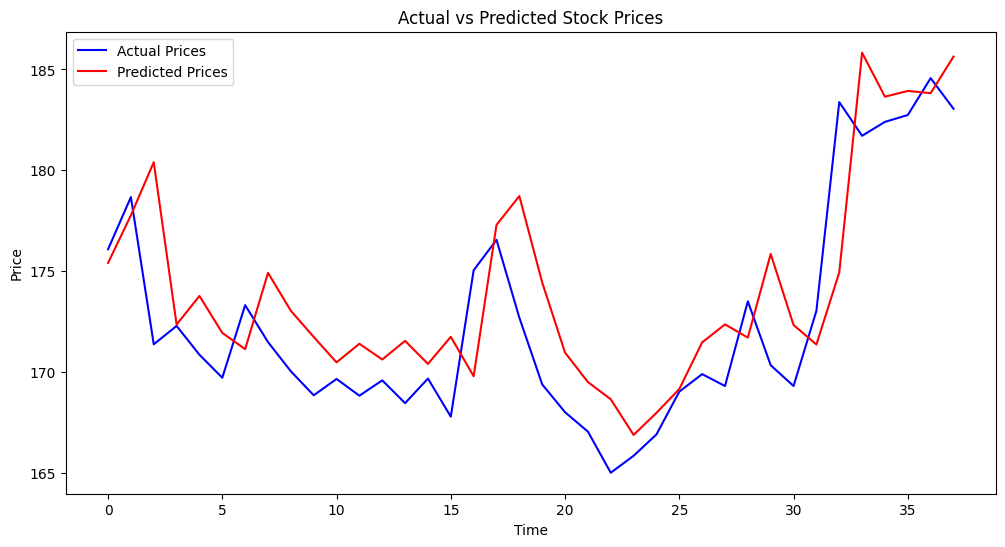

Mean Squared Error (MSE): 11.597560379084273
Root Mean Squared Error (RMSE): 3.4055191056701286


In [14]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the scaled data to get actual prices
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_prices, predicted_prices)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

